In [218]:
import pickle as pkl
import numpy as np
import os

root='/home/lioruzan'
runs0 = [[] for j in range(1)]
for i in range(1):
    if i==6: continue # nothing 
    r = os.path.join(root,'dir%d'%i)
    for j in range(20):
        p = os.path.join(r,'results_{}_full.pkl'.format(j))
        with open(p,'rb') as f:
            runs0[i].append(pkl.load(f))

In [226]:
# format of pickled files: {'gen_data': ( sample_x, x, m, sample_prob, colored_x ), 'size': size}
samps0 = []
datas0 = []
masks0 = []
colrs0 = []
probs0 = []
# collect generates samples from all 8 models for each experiment (20 total)
for j in range(20):
    samp = np.zeros((0,32,32,1),dtype=np.float32)
    data = samp.copy()
    mask = samp.copy().astype(np.int32)
    colr = np.zeros((0,32,32,3),dtype=np.float32)
    prob = np.zeros(len(data), dtype=np.float32)
    for i in [0]:#range(8):
        if i==6: continue
        gen_data = runs0[i][j]['gen_data']
        cutoff = runs0[i][j]['size']
        total = len(gen_data) * len(gen_data[0][0])
        e = total-cutoff
        c = 1



        for sample_x, x, m, sample_prob, colored_x in gen_data:
            if c == len(gen_data):
                sample_x = sample_x[:-e]
                x = x[:-e]
                m = m[:-e]
                colored_x = colored_x[:-e]
                sample_prob[0] = sample_prob[0][:-e]
            samp = np.vstack([samp, sample_x])
            data = np.vstack([data, x])
            mask = np.vstack([mask, m])
            colr = np.vstack([colr, colored_x])
            prob = np.concatenate([prob, sample_prob[0]])
            c += 1
    samps0.append(samp)
    datas0.append(data)
    masks0.append(mask)
    colrs0.append(colr)
    probs0.append(prob)

In [244]:
import pickle as pkl
import numpy as np
import os

root = '/home/lioruzan/latest_checkpoints'
runs = [[] for j in range(8)]
for i in range(8):
    if i==6: continue # nothing 
    r = os.path.join(root,'dir%d'%i)
    for j in range(20):
        p = os.path.join(r,'results_{}.pkl'.format(j))
        with open(p,'rb') as f:
            runs[i].append(pkl.load(f))

In [260]:
# format of pickled files: {'gen_data': ( sample_x, x, m, sample_prob, colored_x ), 'size': size}
samps = []
datas = []
masks = []
colrs = []
probs = []
# collect generates samples from all 8 models for each experiment (20 total)
for j in range(20):
    samp = np.zeros((0,32,32,1),dtype=np.float32)
    data = samp.copy()
    mask = samp.copy().astype(np.int32)
    colr = np.zeros((0,32,32,3),dtype=np.float32)
    prob = np.zeros(len(data), dtype=np.float32)
    for i in [5]:
        if i==6: continue
        gen_data = runs[i][j]['gen_data']
        cutoff = runs[i][j]['size']
        total = len(gen_data) * len(gen_data[0][0])
        e = total-cutoff
        c = 1
        for sample_x, x, m, sample_prob, colored_x in gen_data:
            if c == len(gen_data):
                sample_x = sample_x[:-e]
                x = x[:-e]
                m = m[:-e]
                colored_x = colored_x[:-e]
                sample_prob = sample_prob[:-e]
            samp = np.vstack([samp, sample_x])
            data = np.vstack([data, x])
            mask = np.vstack([mask, m])
            colr = np.vstack([colr, colored_x])
            prob = np.concatenate([prob, sample_prob])
            c += 1
    samps.append(samp)
    datas.append(data)
    masks.append(mask)
    colrs.append(colr)
    probs.append(prob)

In [259]:
average_psnrs=[]
std_psnrs=[]
for run in range(20):
    # calculate mean average psnr
    mses = []
    sample_x = samps[run]
    x = datas[run]
    # calculate per-picture psnr vectorized
    #change to 0..255
    a = np.round(127.5 * sample_x + 127.5)
    b = x
    mse = np.sum( np.power(a-b,2), axis=(1,2,3) ) / np.prod( a.shape[1:] ) # ignore batch size
    
    # discard all samples from padding
    
    psnrs = 20 * ( np.log10(255) - np.log10( np.sqrt(mse) ) )
    psnr_avg, psnr_std = np.mean(psnrs), np.std(psnrs)
    print("average psnr run {}: {}, std: {}".format(run, psnr_avg, psnr_std))
    average_psnrs.append(psnr_avg)
    std_psnrs.append(psnr_std)
    
# show stats summary
if len(average_psnrs)>0:
    print("mean average psnr: {}, std over averages: {}, mean psnr std: {}, std over stds: {}".format(
            np.mean(average_psnrs), np.std(average_psnrs),
            np.mean(std_psnrs), np.std(std_psnrs)))

average psnr run 0: 11.088860511779785, std: 3.095533609390259
average psnr run 1: 10.080475807189941, std: 1.3747891187667847
average psnr run 2: 10.152060508728027, std: 1.5756640434265137
average psnr run 3: 9.179585456848145, std: 1.0890748500823975
average psnr run 4: 9.644028663635254, std: 1.555885672569275
average psnr run 5: 9.926067352294922, std: 1.4796000719070435
average psnr run 6: 10.825973510742188, std: 2.7641360759735107
average psnr run 7: 9.509100914001465, std: 1.537405252456665
average psnr run 8: 10.083322525024414, std: 3.0713534355163574
average psnr run 9: 8.691320419311523, std: 1.6480722427368164
average psnr run 10: 9.738146781921387, std: 1.8706979751586914
average psnr run 11: 8.9645357131958, std: 0.9874289035797119
average psnr run 12: 10.611533164978027, std: 3.030658721923828
average psnr run 13: 8.450210571289062, std: 1.0753170251846313
average psnr run 14: 9.990742683410645, std: 2.1434454917907715
average psnr run 15: 9.036236763000488, std: 1.494

In [82]:
sum([len(o) for o in samps]) / 20 == 147

True

In [211]:
len(colrs[0])

29

In [232]:
# reorder full generation to bla bla blla the same
y = get_orientations(masks0[0])

In [236]:
colrs00 = np.zeros((147,32,32,3),dtype=np.float32)
p = 0
for i in range(8):
    if i == 6: continue
    inds = (y==i).nonzero()[0]
    colrs00[p:p+len(inds)] = colrs0[0][inds]
    p += len(inds)
p == 147

True

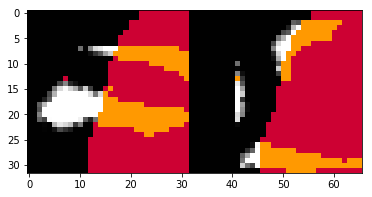

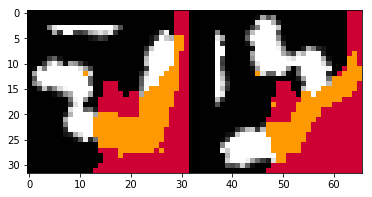

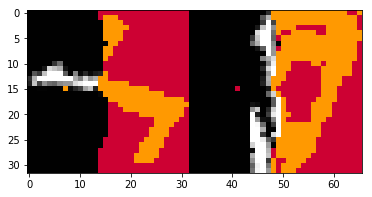

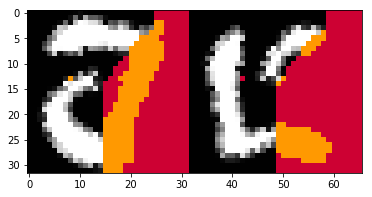

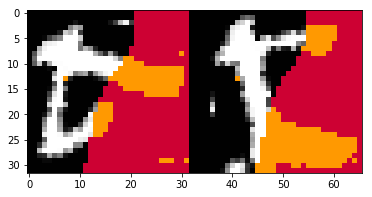

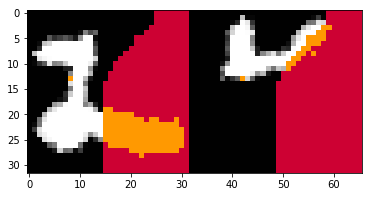

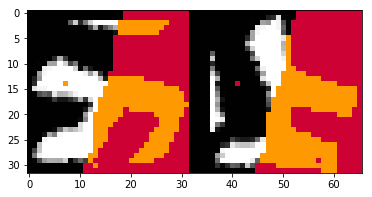

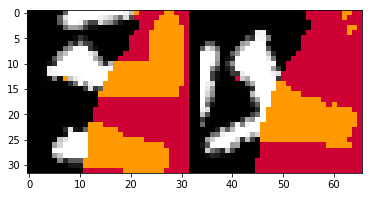

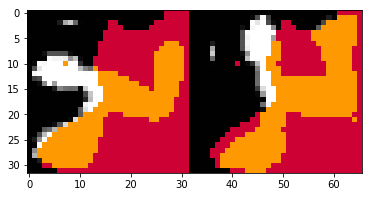

In [261]:
import matplotlib.pyplot as plt
# r = np.random.randperm()
cc=1
for i in range(len(colrs[0])):
    if cc == 10:
        break
    im = np.concatenate([colrs[0][i],np.zeros((32,2,3),dtype=np.float32),colrs[1][i]],axis=1)
    plt.imshow(np.squeeze(im))
    plt.show()
    cc+=1

In [ ]:

''' calculate mean average psnr (+- mean average std)'''
average_psnrs, std_psnrs = [], []
for o, data, _ in runss:
    psnrs=[]
    for i in range(o.shape[0]):
        #change to 0..255
        x = np.round(127.5 * o[i] + 127.5)
        y = data[i]
        #mse
        mse = np.sum( np.power(x-y,2) ) / np.prod( x.shape )
        #psnr
        psnr = 20 * ( np.log10(255) - np.log10(np.sqrt(mse)) )
        psnrs.append(psnr)
        
    psnr_avg, psnr_std = np.mean(psnrs), np.std(psnrs)
    average_psnrs.append(psnr_avg)
    std_psnrs.append(psnr_std)
print('{:.5} +-{:.5}'.format(np.mean(average_psnrs), np.mean(std_psnrs)))


In [169]:
''' PARSE DATA '''
import pandas as pd
import os

labels_csv = os.path.join('letters_data', 'labels.csv')
df = pd.read_csv(labels_csv, encoding='ISO-8859-8', header=None)
df = df.applymap(str.strip)

# clean data
doubles = df.applymap(lambda x: True if len(x)>1 and x.find('!') == -1 else False)[1]
X       = df.applymap(lambda x: True if x == 'X' else False)[1]

df = df[~doubles & ~X].reset_index(drop=True)

# label fix ש -> ה
df.iloc[3659][1]='ה!'

root = 'letters_data'
file_list = []
label_list = []
for _,y in df.iterrows():
    file_list.append(os.path.join(root,y[0][1:].replace('\\','/')))
    label_list.append(y[1])

l = sorted(list(set(label_list)))
label_to_idx = {}
for i,j in enumerate(l):
    label_to_idx[j] = i
label_list = [label_to_idx[s] for s in label_list]

In [197]:
''' IMAGE STATS '''
import scipy.misc as sm
import numpy as np

imgs = [sm.imread(file,mode='RGB') for file in file_list]

shapes=[o.shape for o in imgs]
print(np.median(shapes, axis=0), np.mean(shapes, axis=0), np.std(shapes, axis=0))
print(np.max(shapes,axis=0),np.min(shapes,axis=0))
print(np.argmax(shapes, axis=0), np.argmin(shapes,axis=0))

[ 192.  167.    3.] [ 208.19724556  168.49743231    3.        ] [ 47.07156859  29.70098797   0.        ]
[346 231   3] [143 111   3]
[947  86   0] [1566  952    0]


In [190]:
ars = np.array([o[1]/o[0] for o in shapes])
import scipy.stats as st
# st.mode(ars)[2]
np.histogram(ars,bins=10)

(array([ 201,  413,  549,  916, 1150,  553,  240,  206,   50,    6]),
 array([ 0.34124629,  0.46726152,  0.59327675,  0.71929198,  0.84530722,
         0.97132245,  1.09733768,  1.22335291,  1.34936814,  1.47538337,
         1.6013986 ]))

In [196]:
ars=sorted(ars)
for j in ars: print(j)

0.341246290801
0.365325077399
0.373134328358
0.374622356495
0.375404530744
0.380952380952
0.382089552239
0.383561643836
0.384146341463
0.386581469649
0.386627906977
0.387096774194
0.387573964497
0.387959866221
0.388535031847
0.389380530973
0.389380530973
0.39222614841
0.39222614841
0.394039735099
0.398119122257
0.398713826367
0.400621118012
0.403846153846
0.404761904762
0.405660377358
0.405693950178
0.405797101449
0.405882352941
0.407624633431
0.407738095238
0.408823529412
0.409395973154
0.41049382716
0.41134751773
0.411764705882
0.41265060241
0.413793103448
0.415625
0.415807560137
0.41592920354
0.416129032258
0.416666666667
0.418238993711
0.418918918919
0.419642857143
0.419672131148
0.419825072886
0.420074349442
0.42071197411
0.421538461538
0.421686746988
0.422442244224
0.422818791946
0.424242424242
0.424354243542
0.424836601307
0.425
0.425219941349
0.425605536332
0.425655976676
0.426035502959
0.427184466019
0.427272727273
0.42750929368
0.427609427609
0.428571428571
0.428571428571
0.4

In [3]:
for m in test_letters['masks']:
    sm.imshow(m*255)
    break

In [20]:
len(test_letters['masks'])

147

In [28]:
''' MAKE IMAGES '''
import scipy.misc as sm
import numpy as np

imgs = [sm.imread(file,mode='RGB') for file in file_list]

# resized_imgs = [sm.imresize(im,(32,32)) for im in imgs]

# resized_imgs = [im[np.newaxis,:,:,:] for im in resized_imgs]
# images = np.vstack(resized_imgs)
# labels = np.array(label_list)

[ 192.  167.    3.] [ 47.07156859  29.70098797   0.        ]


In [29]:
''' IMAGE STATS '''
shapes=[o.shape for o in imgs]
print(np.median(shapes, axis=0), np.mean(shapes, axis=0), np.std(shapes, axis=0))
print(np.max(shapes,axis=0),np.min(shapes,axis=0))
print(np.argmax(shapes, axis=0), np.argmin(shapes,axis=0))

[ 192.  167.    3.] [ 208.19724556  168.49743231    3.        ] [ 47.07156859  29.70098797   0.        ]


In [74]:
''' stitch together 4-model adaptive rotation results '''

root = '/home/lioruzan/pixel-cnn/data/letters_data/checkpoints'
runs= [[] for j in range(4)]
for i in range(4):
    r = os.path.join(root,str(i))
    for j in range(10):
        p = os.path.join(r,'results_{}.pkl'.format(j))
        with open(p,'rb') as f:
            runs[i].append(pkl.load(f))
            

runss=[]
for j in range(10):
    samp=np.zeros((0,32,32,3))
    data=samp.copy()
    mask=data.copy()
    for i in range(4):
        for sample,(x,m) in runs[i][j]:
            sample = np.rot90(sample, k=-i, axes=(1,2))
            x = np.rot90(x, k=-i, axes=(1,2))
            m = np.rot90(m, k=-i, axes=(1,2))
            samp = np.vstack([samp,sample])
            data = np.vstack([data,x])
            mask = np.vstack([mask,m])
    runss.append((samp,data,mask))

''' calculate mean average psnr (+- mean average std)'''
average_psnrs, std_psnrs = [], []
for o, data, _ in runss:
    psnrs=[]
    for i in range(o.shape[0]):
        #change to 0..255
        x = 127.5 * o[i] + 127.5
        y = data[i]
        #mse
        mse = np.sum( np.power(x-y,2) ) / np.prod( x.shape )
        #psnr
        psnr = 20 * ( np.log10(255) - np.log10(np.sqrt(mse)) )
        psnrs.append(psnr)
        
    psnr_avg, psnr_std = np.mean(psnrs), np.std(psnrs)
    average_psnrs.append(psnr_avg)
    std_psnrs.append(psnr_std)
print('{:.5} +-{:.5}'.format(np.mean(average_psnrs), np.mean(std_psnrs)))

''' visualize results '''
p=np.random.randint(140)
plt.imshow(runss[0][1][p]/127.5-1)
plt.show()
plt.imshow((runss[0][1][p]/127.5-1)*runss[0][2][p])
plt.show()
plt.imshow(runss[0][0][p])
plt.show()

In [166]:
psnrs

[8.0094482437804793,
 11.576742746439566,
 14.397416623109148,
 16.050003389271453,
 13.547408969241141,
 23.056076520934205,
 12.633913553358219,
 10.246024123511299,
 15.334448796610154,
 11.782192016462133,
 17.510175958815275,
 14.843173007889474,
 16.122954277595923,
 9.2200377348149019,
 11.28626104247334,
 13.515986057497367,
 12.148469563477926,
 9.8219308970910735,
 8.7616479031172201,
 9.9355380158090778,
 19.154202360878038,
 9.3201170342204023,
 16.84945659447223,
 8.0179964062435083,
 45.277232672125834,
 16.739734812845398,
 17.787932509869016,
 14.943535805970427,
 17.171969258429161,
 16.404846435637506,
 9.6479973378444903,
 18.378914848942021,
 15.494049563983769,
 10.581258431914232,
 10.126872069824966,
 16.304898685291889,
 10.819779646181988,
 14.685991622401652,
 15.172440514593362,
 12.363724994144203,
 18.359321153140389,
 20.18213067097788,
 14.180420893095897,
 8.9782805376706776,
 16.63958832636947,
 12.905960815126329,
 13.885445578248623,
 9.83530878940037

In [158]:
import scipy.ndimage.measurements as me
def get_orientations(ms):
    o = np.zeros(len(ms), dtype=np.int32) # orientations
    for i, m in enumerate(ms):
        m = m[:,:,0]
        y,x = me.center_of_mass(m)
        if np.isnan(x) or np.isnan(y): 
            continue
        # center coordinates
        y -= 15.5
        x -= 15.5
        # fill o with optimal orientation for each mask, to maximize exposure
        # of known information (1s in the mask) to PixelCNN
        if y>=0 and x>=0:
            if y>x:
                o[i] = 2 # 2 rotations
            elif y<=x:
                o[i] = 7 # flip + 3 rotations
        elif y>=0 and x<0:
            if y>=-x:
                o[i] = 6 # flip + 2 rotations
            elif y<-x:
                o[i] = 3 # 3 rotations
        elif y<0 and x<0:
            if y>=x:
                o[i] = 5 # flip + 1 rotations
            elif y<x:
                o[i] = 0 # no flips or rotations, this is optimal
        elif y<0 and x>=0:
            if y>=-x:
                o[i] = 1 # one rotation
            if y<-x:
                o[i] = 4 # just flip no rotation needed
    return o

def flip_rotate(x, y):
    '''
    flips and/or rotates a single image according to label y
    y is encoded to represent flips and rotations
    y \in {0..7} or y \in {-7..-1} for reversing rotations\flips
    flip indicator = y // 4 ( or y <= -4 in the negative case )
    rotation angle = (y % 4) * 90 degrees
    because of dihedral group D4 structure, in some cases the order of flip/rotation
    matters, and is dealt with accordingly.
    '''
    if y // 4 == 1 or y == -4 or y == -6:
        x = np.flip(x, len(x.shape)-2)
    if len(x.shape) == 4:
        x = np.rot90(x, k= y % 4, axes=(1,2))
    else:
        x = np.rot90(x, k= y % 4)
    if y == -5 or y == -7:
        x = np.flip(x, len(x.shape)-2)
    return x

In [130]:
import pickle as pkl
with open('./letters_data/letters_test.pkl', 'rb') as f:
    q=pkl.load(f)

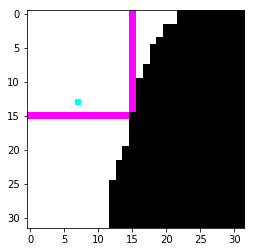

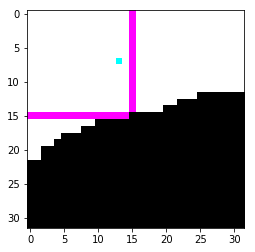

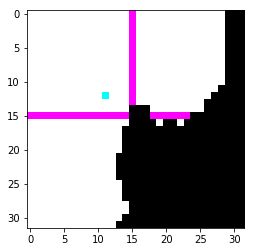

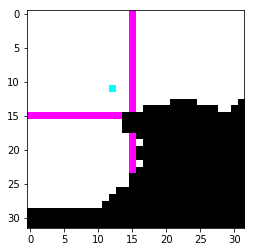

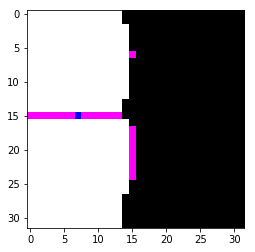

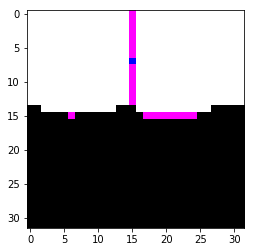

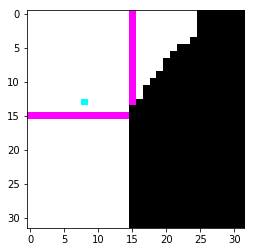

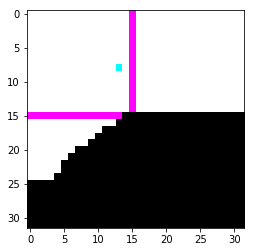

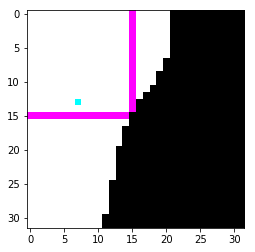

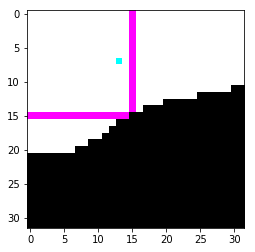

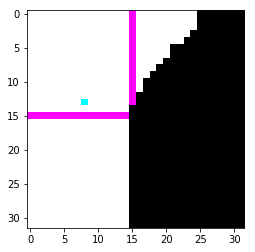

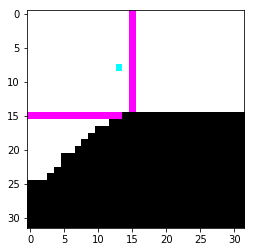

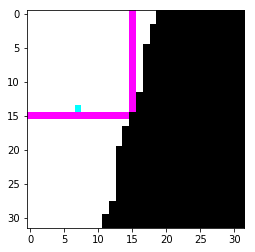

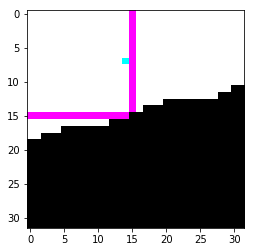

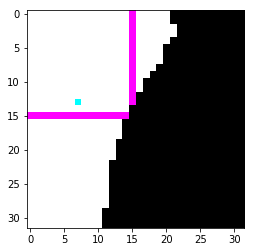

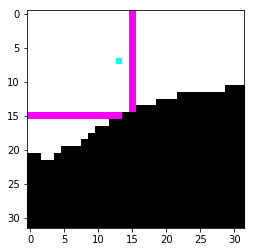

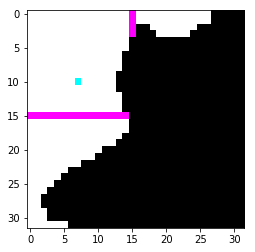

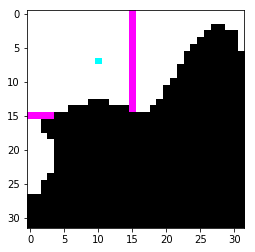

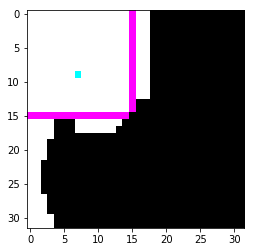

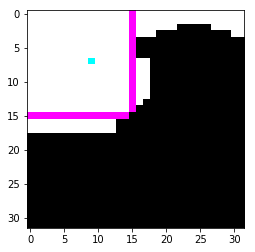

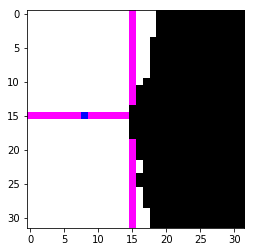

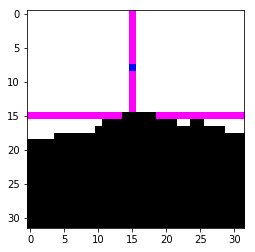

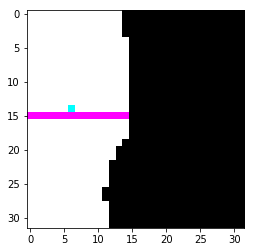

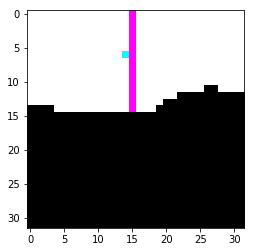

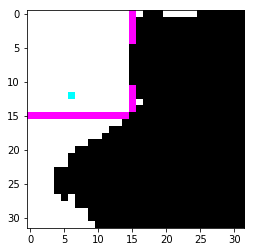

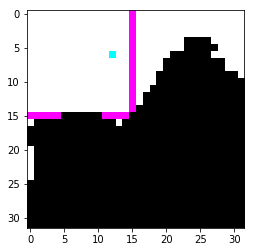

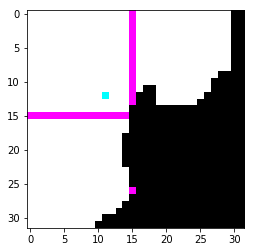

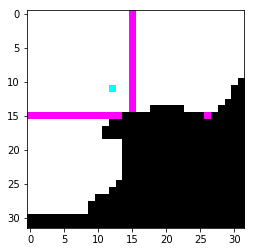

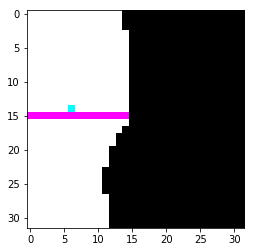

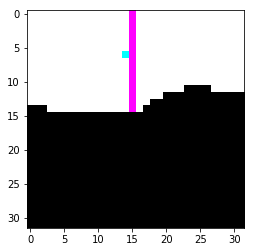

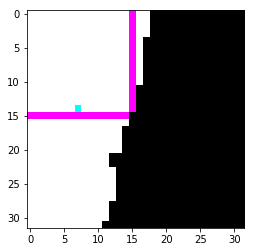

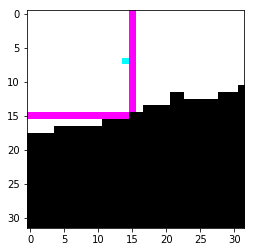

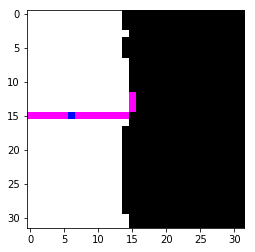

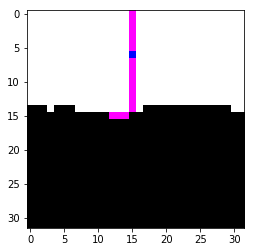

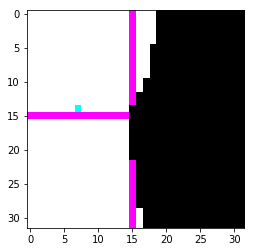

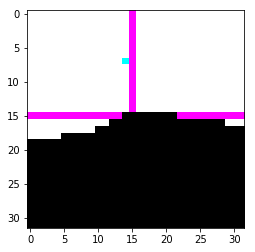

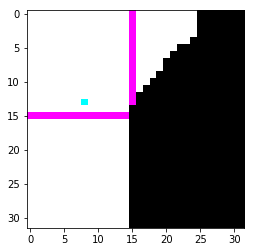

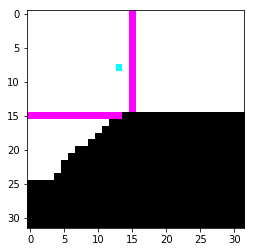

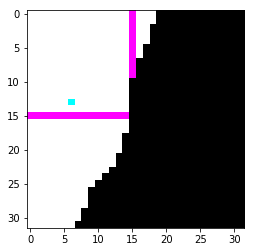

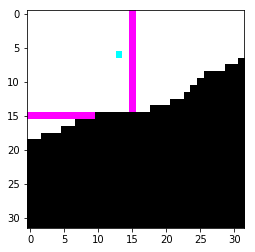

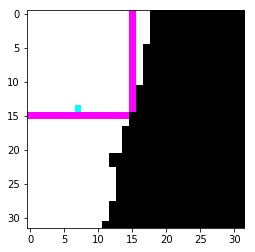

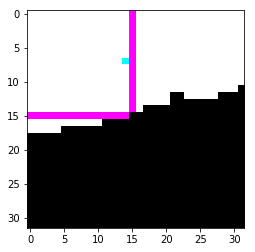

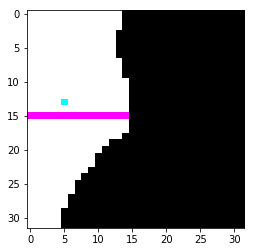

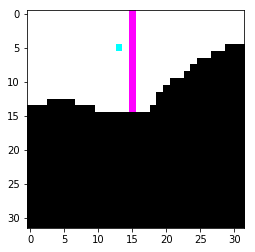

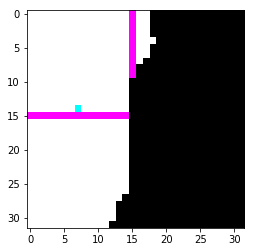

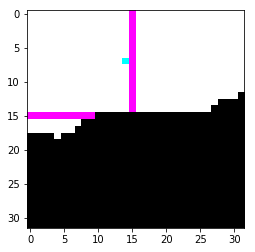

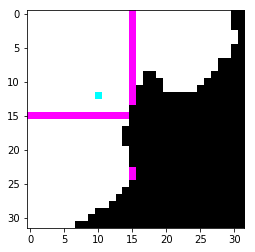

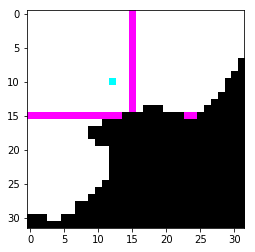

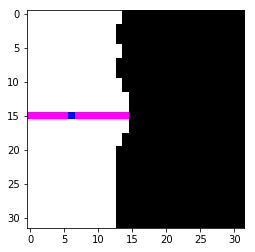

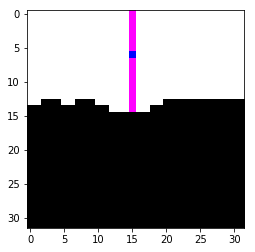

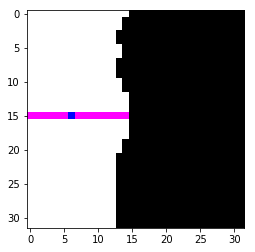

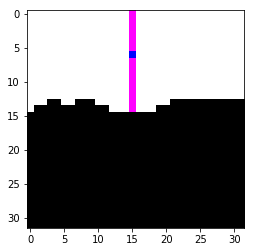

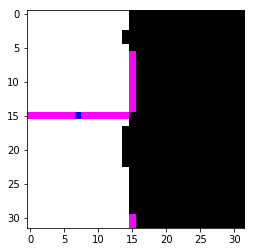

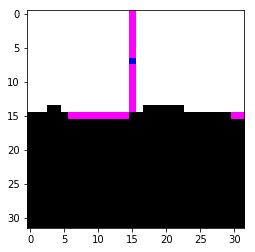

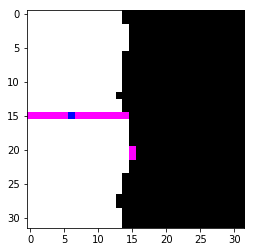

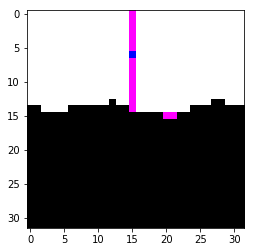

In [187]:
ms = q['masks']

y = get_orientations(ms)



for j in (y==5).nonzero()[0]:
    
    m=ms[j]*255
    mf=flip_rotate(ms[j],y[j])*255

    ym,xm = me.center_of_mass(m[...,0])
    ym,xm=int(ym),int(xm)
    m[ym,xm,0]=0
    m[:,15,1]=0
    m[15,:,1]=0
    ymf,xmf = me.center_of_mass(mf[...,0])
    ymf,xmf=int(ymf),int(xmf)
    mf[ymf,xmf,0]=0
    mf[:,15,1]=0
    mf[15,:,1]=0
    plt.imshow(m)
    plt.show()
    plt.imshow(mf)
    plt.show()